In [ ]:
!nvidia-smi

Fri Oct  6 16:51:24 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    23W / 300W |      0MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 26.5/166.8 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## Inference with Pre-trained COCO Model

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet



from roboflow import Roboflow
rf = Roboflow(api_key="oi5Df7LRPA0DHxce0EwW")
project = rf.workspace("aerialburnpiledetection").project("aerial-burn-pile-detection")
dataset = project.version(1).download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.6 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to Aerial-Burn-Pile-Detection-1 in yolov8:: 100%|██████████| 27042/27042 [00:02<00:00, 9657.12it/s] 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=/content/drive/MyDrive/Final_Project/Train_YOLOv8/last.pt data={dataset.location}/data.yaml epochs=5 imgsz=480 plots=True batch=32 optimizer=Adam workers=8 lr0=0.0001

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Aerial-Burn-Pile-Detection-1/data.yaml, epochs=5, patience=50, batch=32, imgsz=480, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=F

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					   train_batch2.jpg
confusion_matrix.png				   train_batch31410.jpg
events.out.tfevents.1696527930.d09c982d89fa.626.0  train_batch31411.jpg
F1_curve.png					   train_batch31412.jpg
P_curve.png					   val_batch0_labels.jpg
PR_curve.png					   val_batch0_pred.jpg
R_curve.png					   val_batch1_labels.jpg
results.csv					   val_batch1_pred.jpg
results.png					   val_batch2_labels.jpg
train_batch0.jpg				   val_batch2_pred.jpg
train_batch1.jpg				   weights


/content


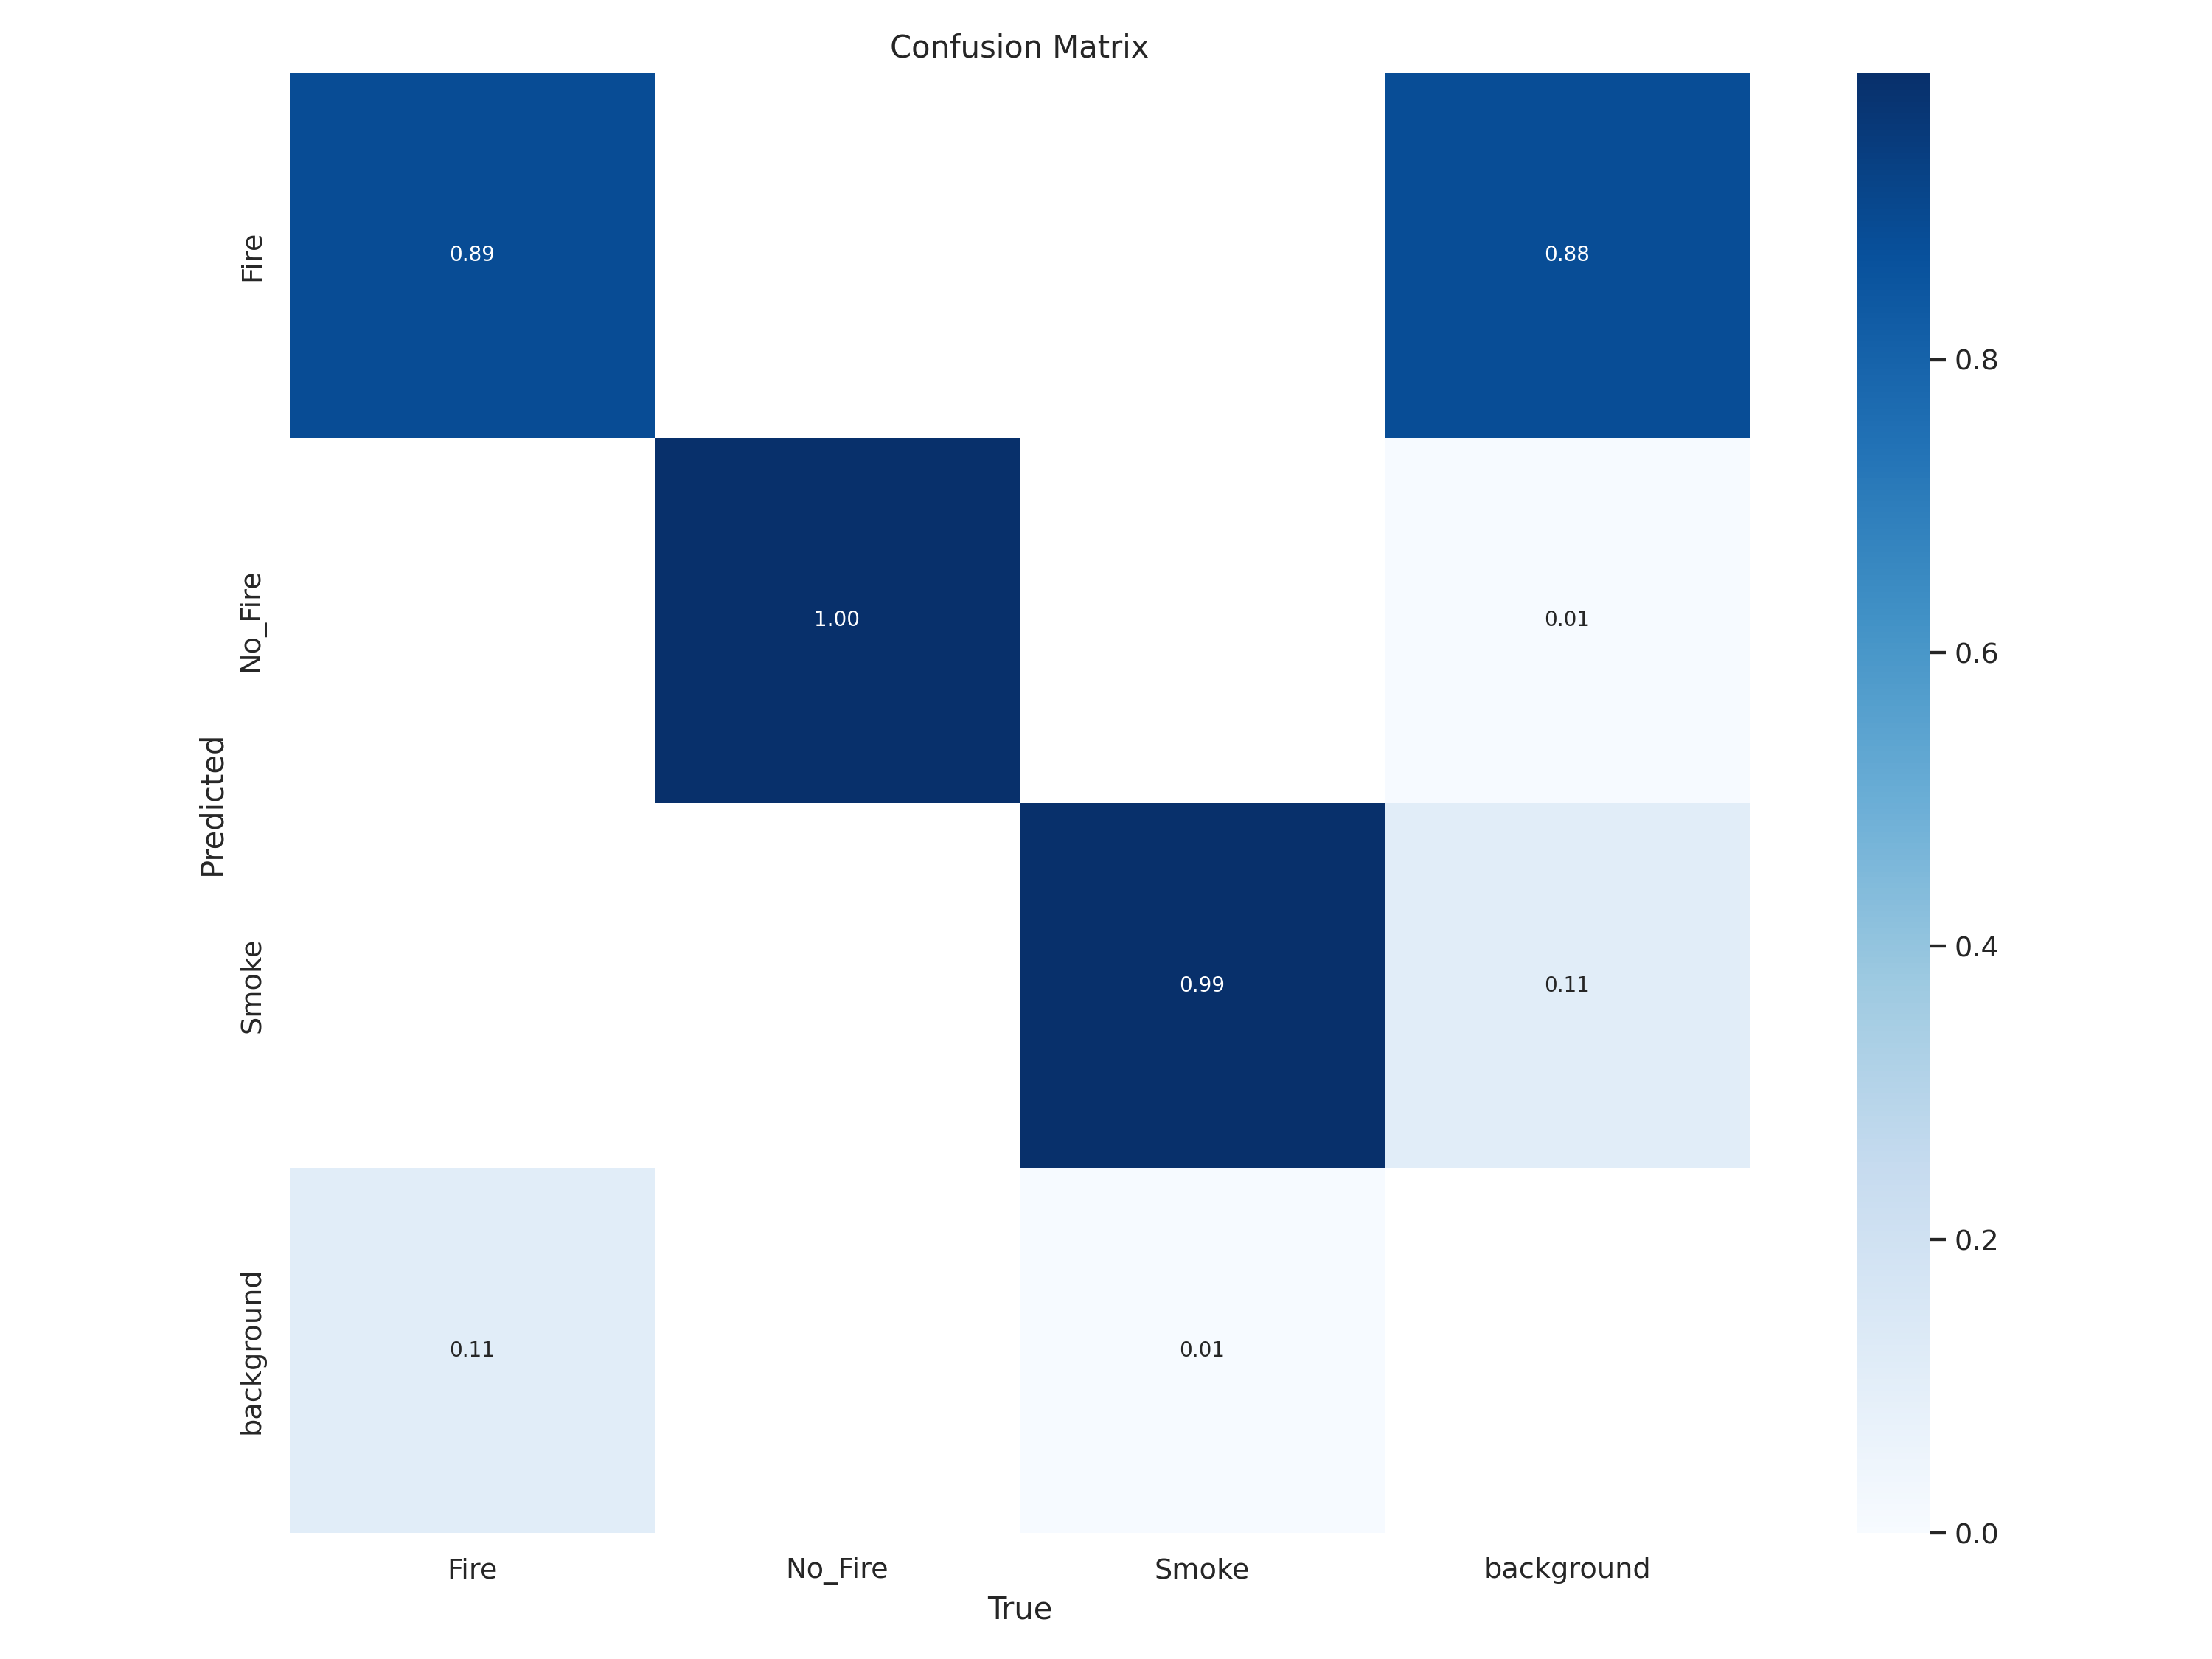

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=1200)

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=1500)

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch2_pred.jpg', width=1200)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-10-06 17:07:48.033191: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-06 17:07:48.928212: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Aerial-Burn-Pile-Detection-1/valid/labels.cache... 1248 images, 0 backgrounds, 0 corrupt: 100% 1248/1248 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 78/78 [00:11<00:00,  7.05it/s]
                   all       1248       2076       0.94      0.917      0.943      0.67

## Inference with Custom Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model= /content/runs/detect/train/weights/best.pt conf=0.5 source= /content/drive/MyDrive/Final_Project/Train_YOLOv8/1212.mp4  save=True show=True source=0

/content
2023-10-06 17:09:30.290175: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-06 17:09:31.150598: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()
OpenCV(4.8.0) /io/opencv/modules/highgui/src/window.cpp:1272: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script 

**NOTE:** Let's take a look at few results.

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/runs/detect/predict/lake_resized_lake_frame11501_jpg.rf.694cdb92c7972ae5fcf2c07c13ddf347.jpg')[:3]:
      display(Image(filename=image_path, width=1200))
      print("\n")

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/runs/detect/predict/lake_resized_lake_frame4964_jpg.rf.788971b8073371a511039c774f908dea.jpg')[:3]:
      display(Image(filename=image_path, width=1200))
      print("\n")

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/runs/detect/predict/resized_frame13835_jpg.rf.619e7c4d566d2a967ff764acdd930709.jpg')[:3]:
      display(Image(filename=image_path, width=1200))
      print("\n")

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/runs/detect/predict/resized_frame21186_jpg.rf.cfcd0688171ef5dda01a9a16cdc98cb6.jpg')[:3]:
      display(Image(filename=image_path, width=1200))
      print("\n")

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/runs/detect/predict/resized_frame1650_jpg.rf.a22c2d4972ad03a1199dc52aedcb5fec.jpg')[:3]:
      display(Image(filename=image_path, width=1200))
      print("\n")

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/runs/detect/predict/resized_frame21905_jpg.rf.04741d0d9d321692cc04e5ae15ef16c3.jpg')[:3]:
      display(Image(filename=image_path, width=1200))
      print("\n")

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/runs/detect/predict/resized_frame2229_jpg.rf.5b6fa839ab1bcda3f077c88dbfce12c9.jpg')[:3]:
      display(Image(filename=image_path, width=1200))
      print("\n")

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/runs/detect/predict/resized_frame21178_jpg.rf.780ae2be0a70be6d9109b6ec4200b0fb.jpg')[:3]:
      display(Image(filename=image_path, width=1200))
      print("\n")

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/runs/detect/predict/009813_jpg.rf.22ef594f20c04cd072402d53bd8e0345.jpg')[:3]:
      display(Image(filename=image_path, width=1200))
      print("\n")

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/runs/detect/predict/001119_jpg.rf.d51d772c4713b4e6401bf2d137abf18b.jpg')[:3]:
      display(Image(filename=image_path, width=1200))
      print("\n")

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/runs/detect/predict/002969_jpg.rf.f4d1faa3b1139931f41c986d160751e6.jpg')[:3]:
      display(Image(filename=image_path, width=1200))
      print("\n")

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on resized_frame7244_jpg.rf.5f80c6321b28ee862f241cb7d341bd26.jpg


{'predictions': [{'x': 294.5,
   'y': 333.0,
   'width': 11.0,
   'height': 28.0,
   'confidence': 0.7612122297286987,
   'class': 'Fire',
   'class_id': 0,
   'image_path': '/content/datasets/Aerial-Burn-Pile-Detection-1/test/images/resized_frame7244_jpg.rf.5f80c6321b28ee862f241cb7d341bd26.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 192.0,
   'y': 252.5,
   'width': 10.0,
   'height': 17.0,
   'confidence': 0.7365176677703857,
   'class': 'Fire',
   'class_id': 0,
   'image_path': '/content/datasets/Aerial-Burn-Pile-Detection-1/test/images/resized_frame7244_jpg.rf.5f80c6321b28ee862f241cb7d341bd26.jpg',
   'prediction_type': 'ObjectDetectionModel'},
  {'x': 213.0,
   'y': 76.5,
   'width': 10.0,
   'height': 25.0,
   'confidence': 0.6069905161857605,
   'class': 'Fire',
   'class_id': 0,
   'image_path': '/content/datasets/Aerial-Burn-Pile-Detection-1/test/images/resized_frame7244_jpg.rf.5f80c6321b28ee862f241cb7d341bd26.jpg',
   'prediction_type': 'ObjectDetectionModel